In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pygimli as pg
from pygimli.mplviewer import drawModel1D

In [12]:
synres = [100., 500., 20., 800.]  # synthetic resistivity
synthk = [4, 6, 10]  # synthetic thickness (lay layer is infinite)
ab2 = np.logspace(-1, 2, 25)  # 0.1 to 100 in 25 steps (8 points per decade)
fBlock = pg.DC1dModelling(len(synres), ab2, ab2/3)
rhoa = fBlock(synthk+synres)
# The data are noisified using a
errPerc = 3.  # relative error of 3 percent
rhoa = rhoa * (pg.randn(len(rhoa)) * errPerc / 100. + 1.)

In [13]:
thk = np.logspace(-0.5, 0.5, 30)
f = pg.DC1dRhoModelling(thk, ab2, ab2/3)

In [18]:
# ab2,synthk+synres
np.median(rhoa),rhoa

(105.72731963468928, <pygimli.core._pygimli_.RVector at 0x23c155d49d0>)

In [6]:
transRho = pg.RTransLogLU(1, 1000)  # lower and upper bound
transRhoa = pg.RTransLog()  # log transformation also for data

In [7]:
inv = pg.RInversion(rhoa, f, transRhoa, transRho, False)  # data vector, f, ...
# The transformations can also be omitted and set individually by
# inv.setTransData(transRhoa)
# inv.setTransModel(transRho)
inv.setRelativeError(errPerc / 100.0)

In [8]:
model = pg.RVector(len(thk)+1, np.median(rhoa))  # uniform values
inv.setModel(model)  #

In [9]:
print("inversion with lam=200")
inv.setLambda(100)
res100 = inv.run()  # result is a pg.RVector, but compatible to numpy array
print('rrms={:.2f}%, chi^2={:.3f}'.format(inv.relrms(), inv.chi2()))
# Decrease the regularization (smoothness) and start (from old result)
print("inversion with lam=20")
inv.setLambda(10)
res10 = inv.run()  # result is a pg.RVector, but compatible to numpy array
print('rrms={:.2f}%, chi^2={:.3f}'.format(inv.relrms(), inv.chi2()))
# We now optimize lambda such that data are fitted within noise (chi^2=1)
print("chi^2=1 optimized inversion")
resChi = inv.runChi1()  # ends up in a lambda of about 3
print("optimized lambda value:", inv.getLambda())
print('rrms={:.2f}%, chi^2={:.3f}'.format(inv.relrms(), inv.chi2()))

inversion with lam=200
rrms=5.14%, chi^2=2.946
inversion with lam=20
rrms=3.39%, chi^2=1.273
chi^2=1 optimized inversion
optimized lambda value: 2.952481653573826
rrms=3.02%, chi^2=1.002


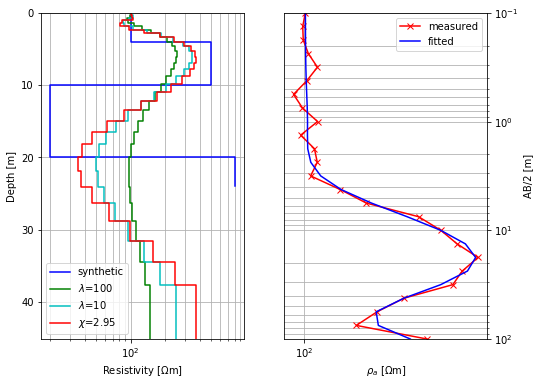

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 6))  # two-column figure
drawModel1D(ax[0], synthk, synres, color='b', label='synthetic',
            plot='semilogx')
drawModel1D(ax[0], thk, res100, color='g', label=r'$\lambda$=100')
drawModel1D(ax[0], thk, res10, color='c', label=r'$\lambda$=10')
drawModel1D(ax[0], thk, resChi, color='r',
            label=r'$\chi$={:.2f}'.format(inv.getLambda()))
ax[0].grid(True, which='both')
ax[0].legend(loc='best')
ax[1].loglog(rhoa, ab2, 'rx-', label='measured')
ax[1].loglog(inv.response(), ab2, 'b-', label='fitted')
ax[1].set_ylim((max(ab2), min(ab2)))
ax[1].grid(True, which='both')
ax[1].set_xlabel(r'$\rho_a$ [$\Omega$m]')
ax[1].set_ylabel('AB/2 [m]')
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.set_ticks_position('right')
ax[1].legend(loc='best')
plt.show()